In [2]:
import numpy as np
import os
import sys
from simulation import heart_rate
from matplotlib import pyplot as plt
from scipy import signal as ss
import utils.signal as sp
from utils.plots import time_plot
%matplotlib widget
import ipywidgets as widgets
from utils.plots import tinyprobe_visualize

plt.style.use('seaborn-whitegrid')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


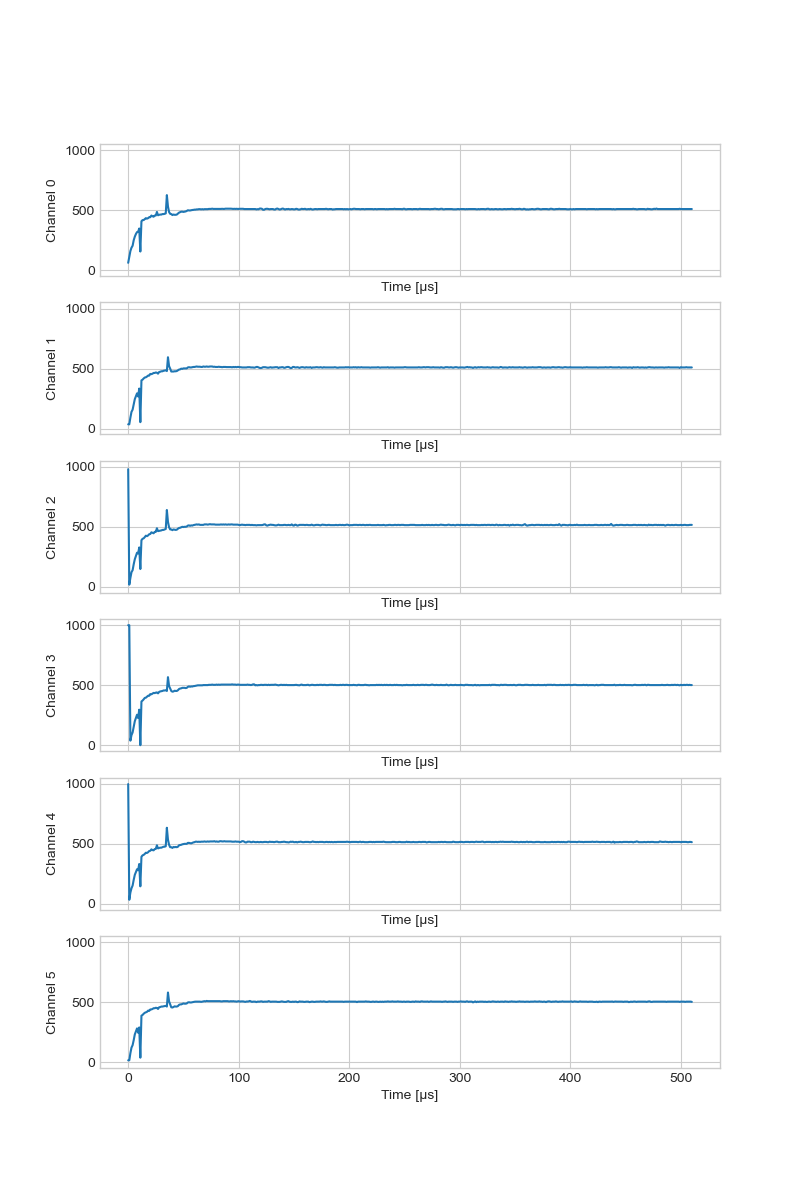

interactive(children=(IntSlider(value=0, description='frame', max=199), Output()), _dom_classes=('widget-inter…

In [65]:
def get_raw(file_name):
    data_file = np.load(file_name)
    return data_file

fs = 7.5e6
raw_data = get_raw(f"TinyProbe_data3_6.03.2024/5.npy")
plt.close("all")
data_filt = sp.butter_bp(raw_data,(1.5e6,2.5e6),fs=fs,axis=-1)
data_analytic = np.abs(ss.hilbert(data_filt,axis=-1))
tinyprobe_visualize(raw_data[:,:6,:],fs=1e6,FPS=1e3)

In [121]:
raw_data.shape

(200, 32, 511)

In [4]:
peak_range= (100,250)
peak_slice = slice(*peak_range)
new_data_len = (peak_range[-1]-peak_range[0])*10
data_analytic_os = ss.resample(data_analytic[10,:,peak_slice],new_data_len,axis=-1)
data_analytic_os.shape

(32, 1500)

In [66]:
plt.close("all")
plt.figure(figsize=(7,3))
def plot_peak(ch=0):    
    peak = ss.find_peaks(data_analytic_os[ch,:],prominence=10)
    plt.clf()
    plt.plot(data_analytic_os[ch,:])
    plt.plot(peak[0],data_analytic_os[ch,peak[0]],'x')
    
    plt.draw()
    plt.show()
    print(peak)
    
widgets.interact(plot_peak, 
                     ch=widgets.IntSlider(min=0, max=31, 
                                             step=1, value=0)
                    )  

interactive(children=(IntSlider(value=0, description='ch', max=31), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_peak(ch=0)>

In [7]:
first_peak_idx = []
for ch in range(data_analytic_os.shape[0]):
    first_peak_idx += [ss.find_peaks(data_analytic_os[ch,:],prominence=10)[0][0]]
np.diff(np.sort(first_peak_idx))

array([ 5, 12,  8, 28,  0, 13,  1, 17, 27,  9,  4,  2, 21, 14, 34, 20, 17,
       36,  7,  6, 21, 43,  3, 12, 43, 24, 16,  3, 43,  6,  1])

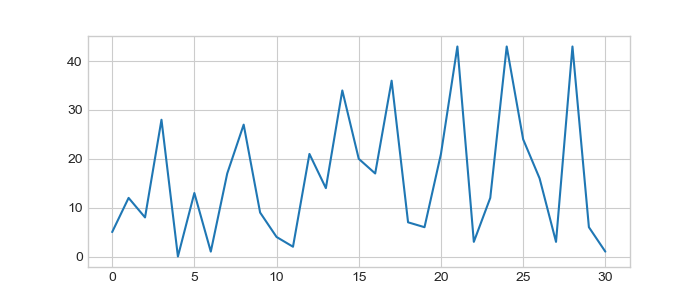

In [8]:
plt.clf()
plt.plot(np.diff(np.sort(first_peak_idx)))
plt.show()

### Finding the order with the first peak

Text(0.5, 0, 'position')

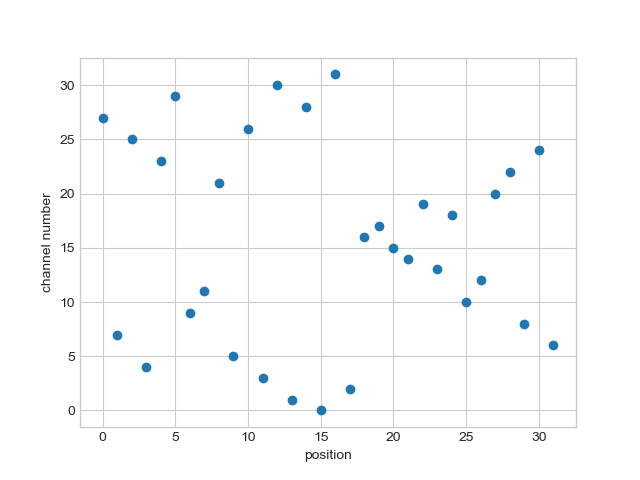

In [60]:
idx_ordered = np.array(sorted(range(len(first_peak_idx)), key=lambda k: first_peak_idx[k]))
list(enumerate(idx_ordered))
plt.figure()
plt.scatter(*np.array(list(enumerate(idx_ordered))).T)
plt.ylabel("channel number")
plt.xlabel("position")

### Finding the start by where the signal exceed a threshold

array([ 5, 12,  8, 28,  0, 13,  1, 17, 27,  9,  4,  2, 21, 14, 34, 20, 17,
       36,  7,  6, 21, 43,  3, 12, 43, 24, 16,  3, 43,  6,  1])

array([[ 1,  7],
       [ 2, 30],
       [ 3, 10],
       [ 4, 28],
       [ 5,  8],
       [ 6, 26],
       [ 7,  5],
       [ 8, 24],
       [ 9, 12],
       [10, 22],
       [11,  6],
       [12, 27],
       [13,  4],
       [14, 31],
       [15,  2],
       [16, 29],
       [17,  1],
       [18, 32],
       [19,  3],
       [20, 18],
       [21, 16],
       [22, 17],
       [23, 15],
       [24, 20],
       [25, 14],
       [26, 19],
       [27, 13],
       [28, 21],
       [29, 11],
       [30, 23],
       [31,  9],
       [32, 25]])

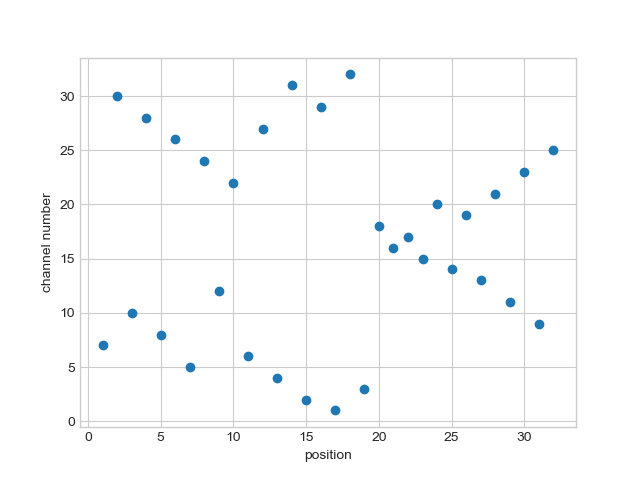

In [77]:
first_above_th = np.argmax(data_analytic_os>30,axis=1)
idx_ordered = np.array(sorted(range(len(first_above_th)), key=lambda k: first_above_th[k]))
list(enumerate(idx_ordered))
plt.figure()
plt.scatter(*np.array(list(enumerate(idx_ordered))).T+1)
plt.ylabel("channel number")
plt.xlabel("position")
display(np.diff(np.sort(first_peak_idx)))
display(np.array(list(enumerate(idx_ordered)))+1)

In [71]:
np.diff(np.sort(first_above_th))

array([315,  13,  10,  11,   9,   8,  16,  12,  17,  17,  12,  20,   6,
        22,  15,  18,  20,  14,  26,  16,  10,  19,  23,  20,  15,  17,
        32,   9,  22,  18,  23])

In [59]:
plt.close("all")
plt.figure(figsize=(7,3))
def plot_peak(ch=0): 
    ch = idx_ordered[ch]
    peak = ss.find_peaks(data_analytic_os[ch,:],prominence=10)
    plt.clf()
    plt.plot(data_analytic_os[ch,:])
    plt.plot(peak[0],data_analytic_os[ch,peak[0]],'x')
    plt.ylim(0,250)
    plt.draw()
    plt.show()
    print("channel",ch)
    print()
    print(peak)
    
widgets.interact(plot_peak, 
                     ch=widgets.IntSlider(min=0, max=31, 
                                             step=1, value=0)
                )

interactive(children=(IntSlider(value=0, description='ch', max=31), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_peak(ch=0)>

In [45]:
((idx_ordered))

array([ 6, 29,  9, 27,  7, 25,  4, 23, 11, 21,  5, 26,  3, 30,  1, 28,  0,
       31,  2, 17, 15, 16, 14, 19, 13, 18, 12, 20, 10, 22,  8, 24])

Text(0.5, 0, 'position')

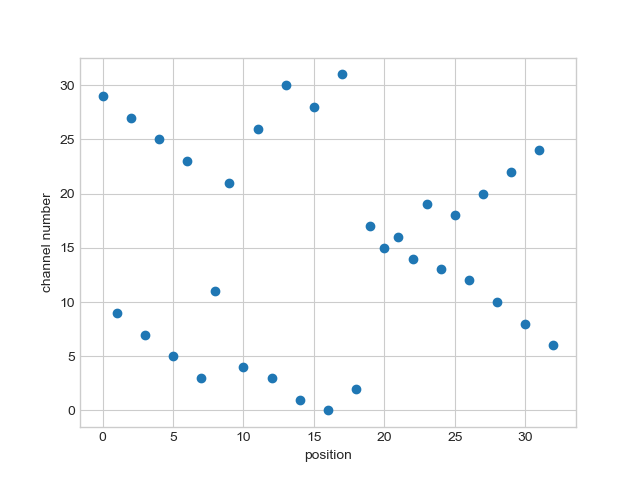

In [52]:
idx_ordered= np.array([29,  9, 27,  7, 25,  5, 23, 3, 11, 21,  4, 26,  3, 30,  1, 28,  0,
       31,  2, 17, 15, 16, 14, 19, 13, 18, 12, 20, 10, 22,  8, 24, 6])

plt.figure()
plt.scatter(*np.array(list(enumerate(idx_ordered))).T)
plt.ylabel("channel number")
plt.xlabel("position")

[(0, 17), (1, 0), (2, 1), (3, 16), (4, 19), (5, 2), (6, 3), (7, 18), (8, 21), (9, 4), (10, 5), (11, 20), (12, 23), (13, 6), (14, 7), (15, 22), (16, 25), (17, 8), (18, 9), (19, 24), (20, 27), (21, 10), (22, 11), (23, 26), (24, 29), (25, 12), (26, 13), (27, 28), (28, 31), (29, 14), (30, 15), (31, 30)]

[(6, 17), (29, 0), (9, 1), (27, 16), (7, 19), (25, 2), (4, 3), (23, 18), (11, 21), (21, 4), (5, 5), (26, 20), (3, 23), (30, 6), (1, 7), (28, 22), (0, 25), (31, 8), (2, 9), (17, 24), (15, 27), (16, 10), (14, 11), (19, 26), (13, 29), (18, 12), (12, 13), (20, 28), (10, 31), (22, 14), (8, 15), (24, 30)]


[1,
 2,
 5,
 6,
 9,
 10,
 13,
 14,
 17,
 18,
 21,
 22,
 25,
 26,
 29,
 30,
 3,
 0,
 7,
 4,
 11,
 8,
 15,
 12,
 19,
 16,
 23,
 20,
 27,
 24,
 31,
 28]

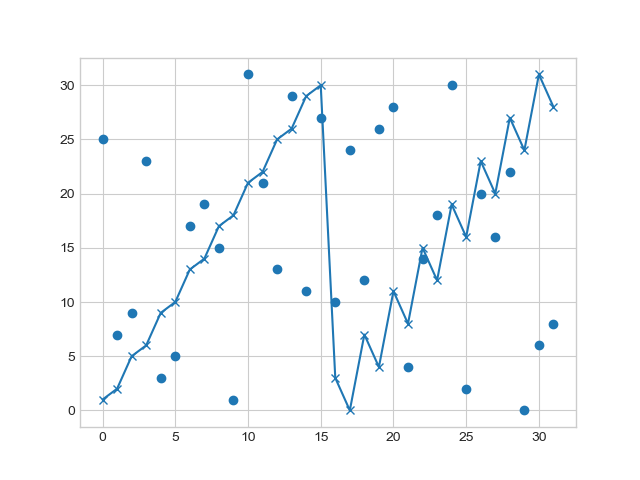

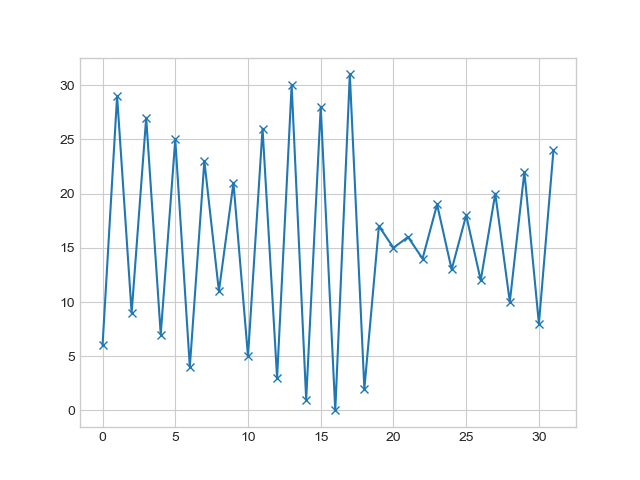

In [108]:
map_rx_trans= np.array([3,2,7,6,11,10,15,14,19,18,23,22,27,26,31,30,1,4,5,8,9,12,13,16,17,20,21,24,25,28,29,32])
map_rx_trans2= np.array([2,3,6,7,10,11,14,15,18,19,22,23,26,27,30,31,4,1,8,5,12,9,16,13,20,17,24,21,28,25,32,29])
idx_rx_trans= np.array(sorted(range(len(map_rx_trans2)), key=lambda k: map_rx_trans2[k]))
print(list(enumerate(idx_rx_trans)))
plt.close("all")
plt.scatter(idx_ordered,idx_rx_trans)
print()
print(list(zip(idx_ordered,idx_rx_trans)))
plt.plot(sorted(list(idx_ordered),key=lambda k: idx_rx_trans[k]),'x-')
plt.figure()
plt.plot(idx_ordered,'x-')
sorted(list(idx_ordered),key=lambda k: idx_rx_trans[k])

In [106]:
list(idx_ordered)

[6,
 29,
 9,
 27,
 7,
 25,
 4,
 23,
 11,
 21,
 5,
 26,
 3,
 30,
 1,
 28,
 0,
 31,
 2,
 17,
 15,
 16,
 14,
 19,
 13,
 18,
 12,
 20,
 10,
 22,
 8,
 24]

[ 6 29  9 27  7 25  4 23 11 21  5 26  3 30  1 28  0 31  2 17 15 16 14 19
 13 18 12 20 10 22  8 24]
[17  0  1 16 19  2  3 18 21  4  5 20 23  6  7 22 25  8  9 24 27 10 11 26
 29 12 13 28 31 14 15 30]


[1,
 2,
 5,
 6,
 9,
 10,
 13,
 14,
 17,
 18,
 21,
 22,
 25,
 26,
 29,
 30,
 3,
 0,
 7,
 4,
 11,
 8,
 15,
 12,
 19,
 16,
 23,
 20,
 27,
 24,
 31,
 28]

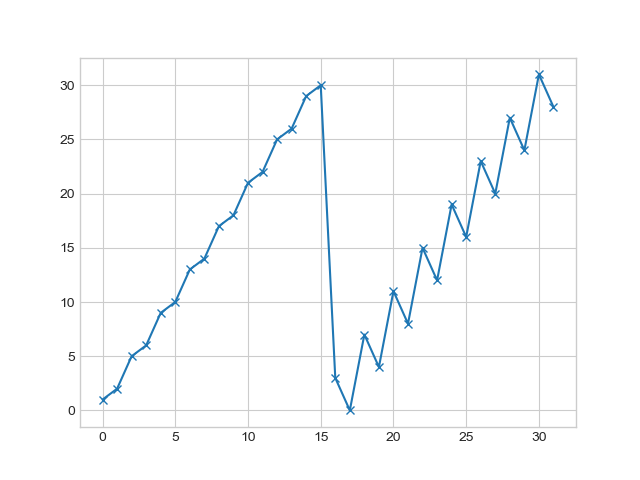

In [120]:
plt.close()
plt.figure()
plt.plot(sorted(list(idx_rx_trans),key=lambda k: idx_rx_trans[k]),'x-')
print(idx_ordered)
print(idx_rx_trans)
sorted(list(idx_ordered),key=lambda k: idx_rx_trans[k])
sorted(range(32),key=lambda k: idx_rx_trans[k])